In [1]:
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import torch.nn as nn

In [2]:
def image_arrs(paths, im_arr):
    for path in paths:
        #read images, may need to change filepath
        image = cv2.imread('gtsrb-german-traffic-sign/'+path)
        image_from_array = Image.fromarray(image, 'RGB')
        #resize all images to 30x301
        size_image = image_from_array.resize((30, 30))
        #convert images to array
        image_arr = np.array(size_image.getdata(),
                        np.uint8).reshape(size_image.size[1], size_image.size[0], 3)
        im_arr.append(image_arr.flatten())
    return im_arr

In [3]:
train_df = pd.read_csv('gtsrb-german-traffic-sign/Train.csv')
test_df = pd.read_csv('gtsrb-german-traffic-sign/Test.csv')

In [4]:
train_data = train_df[(train_df['ClassId']==1)][['ClassId','Path']].values
test_data = test_df[(test_df['ClassId']==1)][['ClassId','Path']].values
for i in range(2,4):
    train_data = np.vstack((train_data, train_df[(train_df['ClassId']==i)][['ClassId','Path']].values))
for i in range(2,4):
    test_data = np.vstack((test_data, test_df[(test_df['ClassId']==i)][['ClassId','Path']].values))

In [5]:
X_train = []
X_train = image_arrs(train_data[:,1],X_train)
y_train = train_data[:,0]
X_test = []
X_test = image_arrs(test_data[:,1], X_test)
y_test = test_data[:,0]

In [6]:
X_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy((np.array(y_train, dtype = np.int)-1)).long()
X_test = torch.from_numpy(np.array(X_test)).float()
y_test = torch.from_numpy(np.array(y_test, dtype = np.int)-1).long()

In [7]:
class GTSRB_Net(torch.nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size, num_classes):
        
        super(GTSRB_Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.fc3 = nn.Linear(hidden2_size, num_classes)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.relu(out)
        out = self.fc3(out)
        out = F.softmax(out, dim = 1)
        return out

In [8]:
GTSRB_model = GTSRB_Net(2700, 5, 3, 3)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(GTSRB_model.parameters(),lr = 0.000001)

In [9]:
Loss = []
for epoch in range(1000):
    y_pred = GTSRB_model(X_train.view(-1,2700))
    
    loss = criterion(y_pred, y_train)
    Loss.append(loss)
    print(epoch, loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 tensor(1.0948, grad_fn=<NllLossBackward>)
1 tensor(1.0947, grad_fn=<NllLossBackward>)
2 tensor(1.0947, grad_fn=<NllLossBackward>)
3 tensor(1.0946, grad_fn=<NllLossBackward>)
4 tensor(1.0946, grad_fn=<NllLossBackward>)
5 tensor(1.0945, grad_fn=<NllLossBackward>)
6 tensor(1.0944, grad_fn=<NllLossBackward>)
7 tensor(1.0944, grad_fn=<NllLossBackward>)
8 tensor(1.0943, grad_fn=<NllLossBackward>)
9 tensor(1.0943, grad_fn=<NllLossBackward>)
10 tensor(1.0942, grad_fn=<NllLossBackward>)
11 tensor(1.0942, grad_fn=<NllLossBackward>)
12 tensor(1.0941, grad_fn=<NllLossBackward>)
13 tensor(1.0941, grad_fn=<NllLossBackward>)
14 tensor(1.0941, grad_fn=<NllLossBackward>)
15 tensor(1.0940, grad_fn=<NllLossBackward>)
16 tensor(1.0940, grad_fn=<NllLossBackward>)
17 tensor(1.0939, grad_fn=<NllLossBackward>)
18 tensor(1.0939, grad_fn=<NllLossBackward>)
19 tensor(1.0938, grad_fn=<NllLossBackward>)
20 tensor(1.0938, grad_fn=<NllLossBackward>)
21 tensor(1.0938, grad_fn=<NllLossBackward>)
22 tensor(1.0937, gr

189 tensor(1.0928, grad_fn=<NllLossBackward>)
190 tensor(1.0928, grad_fn=<NllLossBackward>)
191 tensor(1.0928, grad_fn=<NllLossBackward>)
192 tensor(1.0928, grad_fn=<NllLossBackward>)
193 tensor(1.0928, grad_fn=<NllLossBackward>)
194 tensor(1.0928, grad_fn=<NllLossBackward>)
195 tensor(1.0928, grad_fn=<NllLossBackward>)
196 tensor(1.0928, grad_fn=<NllLossBackward>)
197 tensor(1.0928, grad_fn=<NllLossBackward>)
198 tensor(1.0928, grad_fn=<NllLossBackward>)
199 tensor(1.0928, grad_fn=<NllLossBackward>)
200 tensor(1.0928, grad_fn=<NllLossBackward>)
201 tensor(1.0928, grad_fn=<NllLossBackward>)
202 tensor(1.0928, grad_fn=<NllLossBackward>)
203 tensor(1.0928, grad_fn=<NllLossBackward>)
204 tensor(1.0928, grad_fn=<NllLossBackward>)
205 tensor(1.0928, grad_fn=<NllLossBackward>)
206 tensor(1.0928, grad_fn=<NllLossBackward>)
207 tensor(1.0928, grad_fn=<NllLossBackward>)
208 tensor(1.0928, grad_fn=<NllLossBackward>)
209 tensor(1.0928, grad_fn=<NllLossBackward>)
210 tensor(1.0928, grad_fn=<NllLos

375 tensor(1.0928, grad_fn=<NllLossBackward>)
376 tensor(1.0928, grad_fn=<NllLossBackward>)
377 tensor(1.0928, grad_fn=<NllLossBackward>)
378 tensor(1.0928, grad_fn=<NllLossBackward>)
379 tensor(1.0928, grad_fn=<NllLossBackward>)
380 tensor(1.0928, grad_fn=<NllLossBackward>)
381 tensor(1.0928, grad_fn=<NllLossBackward>)
382 tensor(1.0928, grad_fn=<NllLossBackward>)
383 tensor(1.0928, grad_fn=<NllLossBackward>)
384 tensor(1.0928, grad_fn=<NllLossBackward>)
385 tensor(1.0928, grad_fn=<NllLossBackward>)
386 tensor(1.0928, grad_fn=<NllLossBackward>)
387 tensor(1.0928, grad_fn=<NllLossBackward>)
388 tensor(1.0928, grad_fn=<NllLossBackward>)
389 tensor(1.0928, grad_fn=<NllLossBackward>)
390 tensor(1.0928, grad_fn=<NllLossBackward>)
391 tensor(1.0928, grad_fn=<NllLossBackward>)
392 tensor(1.0928, grad_fn=<NllLossBackward>)
393 tensor(1.0928, grad_fn=<NllLossBackward>)
394 tensor(1.0928, grad_fn=<NllLossBackward>)
395 tensor(1.0928, grad_fn=<NllLossBackward>)
396 tensor(1.0928, grad_fn=<NllLos

567 tensor(1.0928, grad_fn=<NllLossBackward>)
568 tensor(1.0928, grad_fn=<NllLossBackward>)
569 tensor(1.0928, grad_fn=<NllLossBackward>)
570 tensor(1.0928, grad_fn=<NllLossBackward>)
571 tensor(1.0928, grad_fn=<NllLossBackward>)
572 tensor(1.0928, grad_fn=<NllLossBackward>)
573 tensor(1.0928, grad_fn=<NllLossBackward>)
574 tensor(1.0928, grad_fn=<NllLossBackward>)
575 tensor(1.0928, grad_fn=<NllLossBackward>)
576 tensor(1.0928, grad_fn=<NllLossBackward>)
577 tensor(1.0928, grad_fn=<NllLossBackward>)
578 tensor(1.0928, grad_fn=<NllLossBackward>)
579 tensor(1.0928, grad_fn=<NllLossBackward>)
580 tensor(1.0928, grad_fn=<NllLossBackward>)
581 tensor(1.0928, grad_fn=<NllLossBackward>)
582 tensor(1.0928, grad_fn=<NllLossBackward>)
583 tensor(1.0927, grad_fn=<NllLossBackward>)
584 tensor(1.0927, grad_fn=<NllLossBackward>)
585 tensor(1.0927, grad_fn=<NllLossBackward>)
586 tensor(1.0927, grad_fn=<NllLossBackward>)
587 tensor(1.0927, grad_fn=<NllLossBackward>)
588 tensor(1.0927, grad_fn=<NllLos

746 tensor(1.0928, grad_fn=<NllLossBackward>)
747 tensor(1.0928, grad_fn=<NllLossBackward>)
748 tensor(1.0928, grad_fn=<NllLossBackward>)
749 tensor(1.0928, grad_fn=<NllLossBackward>)
750 tensor(1.0928, grad_fn=<NllLossBackward>)
751 tensor(1.0928, grad_fn=<NllLossBackward>)
752 tensor(1.0928, grad_fn=<NllLossBackward>)
753 tensor(1.0928, grad_fn=<NllLossBackward>)
754 tensor(1.0928, grad_fn=<NllLossBackward>)
755 tensor(1.0928, grad_fn=<NllLossBackward>)
756 tensor(1.0928, grad_fn=<NllLossBackward>)
757 tensor(1.0928, grad_fn=<NllLossBackward>)
758 tensor(1.0928, grad_fn=<NllLossBackward>)
759 tensor(1.0928, grad_fn=<NllLossBackward>)
760 tensor(1.0928, grad_fn=<NllLossBackward>)
761 tensor(1.0928, grad_fn=<NllLossBackward>)
762 tensor(1.0928, grad_fn=<NllLossBackward>)
763 tensor(1.0928, grad_fn=<NllLossBackward>)
764 tensor(1.0928, grad_fn=<NllLossBackward>)
765 tensor(1.0928, grad_fn=<NllLossBackward>)
766 tensor(1.0928, grad_fn=<NllLossBackward>)
767 tensor(1.0928, grad_fn=<NllLos

932 tensor(1.0928, grad_fn=<NllLossBackward>)
933 tensor(1.0928, grad_fn=<NllLossBackward>)
934 tensor(1.0928, grad_fn=<NllLossBackward>)
935 tensor(1.0928, grad_fn=<NllLossBackward>)
936 tensor(1.0928, grad_fn=<NllLossBackward>)
937 tensor(1.0928, grad_fn=<NllLossBackward>)
938 tensor(1.0928, grad_fn=<NllLossBackward>)
939 tensor(1.0928, grad_fn=<NllLossBackward>)
940 tensor(1.0928, grad_fn=<NllLossBackward>)
941 tensor(1.0928, grad_fn=<NllLossBackward>)
942 tensor(1.0928, grad_fn=<NllLossBackward>)
943 tensor(1.0928, grad_fn=<NllLossBackward>)
944 tensor(1.0928, grad_fn=<NllLossBackward>)
945 tensor(1.0928, grad_fn=<NllLossBackward>)
946 tensor(1.0928, grad_fn=<NllLossBackward>)
947 tensor(1.0928, grad_fn=<NllLossBackward>)
948 tensor(1.0928, grad_fn=<NllLossBackward>)
949 tensor(1.0928, grad_fn=<NllLossBackward>)
950 tensor(1.0928, grad_fn=<NllLossBackward>)
951 tensor(1.0928, grad_fn=<NllLossBackward>)
952 tensor(1.0928, grad_fn=<NllLossBackward>)
953 tensor(1.0928, grad_fn=<NllLos

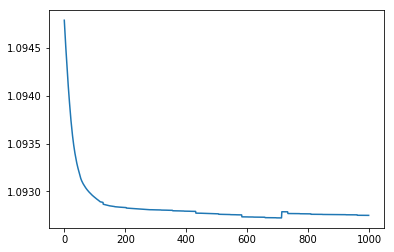

In [10]:
plt.plot(Loss)

In [13]:
GTSRB_model(X_test.view(-1,2700))

tensor([[0.2554, 0.4962, 0.2484],
        [0.2554, 0.4962, 0.2484],
        [0.2554, 0.4962, 0.2484],
        ...,
        [0.2554, 0.4962, 0.2484],
        [0.2554, 0.4962, 0.2484],
        [0.2554, 0.4962, 0.2484]], grad_fn=<SoftmaxBackward>)